# 교차분석 = crosstab 이용해서 범주형 - 범주형 데이터 분석 하는 것

In [2]:
import pandas as pd

# 데이터 불러오기

In [3]:
bank = pd.read_csv("bank.csv", sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


- 교차표 생성
- pd.crosstab(인덱스, 컬럼)

In [4]:
crosstab = pd.crosstab(bank.education, bank.marital) 
crosstab

marital,divorced,married,single
education,,,
primary,79,526,73
secondary,270,1427,609
tertiary,155,727,468
unknown,24,117,46


In [5]:
# margins = All이라는 컬럼을 만들어서 총합을 나타내줌
crosstab_margin = pd.crosstab(bank.education, bank.marital, margins = True)
crosstab_margin

marital,divorced,married,single,All
education,,,,
primary,79,526,73,678
secondary,270,1427,609,2306
tertiary,155,727,468,1350
unknown,24,117,46,187
All,528,2797,1196,4521


In [6]:
# nomalize = 전체에 대한 비율을 나타냄
crosstab_norm = pd.crosstab(bank.education, bank.marital, margins = True, normalize = True)
crosstab_norm

marital,divorced,married,single,All
education,,,,
primary,0.017474,0.116346,0.016147,0.149967
secondary,0.059721,0.315638,0.134705,0.510064
tertiary,0.034284,0.160805,0.103517,0.298607
unknown,0.005309,0.025879,0.010175,0.041363
All,0.116788,0.618668,0.264543,1.000000


- 교차분석 crosstab 이용해서 범주형 - 범주형 데이터 분석 하는 것

In [7]:
from scipy import stats

In [8]:
stats.chi2_contingency(crosstab)
# 139. ~~~ = 카이값
# 1.56~~  = p-value 값  
# array = 기대빈도

(139.08916465578477,
 1.560113682338989e-27,
 6,
 array([[  79.18248175,  419.45719973,  179.36031851],
        [ 269.31386861, 1426.64941385,  610.03671754],
        [ 157.66423358,  835.20238885,  357.13337757],
        [  21.83941606,  115.69099757,   49.46958637]]))

In [9]:
crosstab

marital,divorced,married,single
education,,,
primary,79,526,73
secondary,270,1427,609
tertiary,155,727,468
unknown,24,117,46


 - 시각화

In [10]:
import matplotlib.pyplot as pit
%matplotlib inline

<AxesSubplot:xlabel='education'>

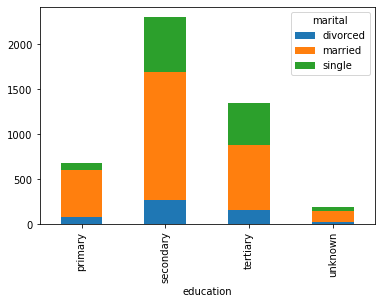

In [15]:
crosstab.plot(kind = "bar", stacked = True)